# Import CSV

In [3]:
import pandas as pd
from IPython.display import display
df = pd.read_csv('alldatatrainextra.csv')
dftest = pd.read_csv('alldatatestextra.csv')
display(df)

,review_id,app_id,review_text,label
0,138255165,1159690,A Raft style survival where you basically brin...,0
1,138255297,1159690,real good game,1
2,138252244,1667180,Finished it in 24 hours. I liked it. Somehow i...,1
3,138273841,1559600,Pretty horses game. addicted. ahh.,1
4,138274158,855740,not very fun,0
...,...,...,...,...
1005,138675867,1304930,Its like Dead by Daylight but muuch better and...,1
1006,138682108,1742020,korone beat the shit out of me with a chainsaw...,1
1007,138675949,1304930,GRIND!,1
1008,138676038,1304930,Fantastic addition to the Outlast series.\nLov...,1


# Model B: Bernouilli Naïve Bayes

## Preprocessing by removing NAs and duplicates

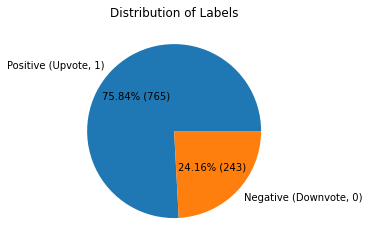

In [5]:
import matplotlib.pyplot as plt
value_counts = df['label'].value_counts()
labels = ['Positive (Upvote, 1)', 'Negative (Downvote, 0)']
plt.pie(value_counts, labels=labels, autopct=lambda pct: f"{pct:.2f}% ({int(pct/100*sum(value_counts))})")
plt.title('Distribution of Labels')
plt.show()

In [6]:
df.isnull().sum()

review_id      0
app_id         0
review_text    3
label          0
dtype: int64

In [7]:
dftest.isnull().sum()

review_id      0
app_id         0
review_text    0
label          0
dtype: int64

In [8]:
df.duplicated().sum()

6

In [9]:
dftest.duplicated().sum()

0

In [10]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


     review_id   app_id                                        review_text  \
26   138092804  2311190  how the fuck is this game similar to resident ...   
63   138092804  2311190  how the fuck is this game similar to resident ...   
207  138091990  2311190                                                  1   
208  138092804  2311190  how the fuck is this game similar to resident ...   
315  138092804  2311190  how the fuck is this game similar to resident ...   
324  138092877  1742020  very fun , waifu gelud cuma kurang main chara ...   

     label  
26       0  
63       0  
207      0  
208      0  
315      0  
324      1  


In [11]:
df_removed = df.drop_duplicates()

In [12]:
from collections import Counter
review_vis = df.copy()
review_vis['Num_word_review'] = review_vis['review_text'].apply(lambda x:len(str(x).split()))
review_vis['temp_list'] = review_vis['review_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in review_vis['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,3480
1,to,2299
2,a,2147
3,and,2139
4,of,1571
5,I,1421
6,is,1383
7,game,1120
8,you,1119
9,it,1028


In [13]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import nltk

In [14]:
new_df = df_removed

In [15]:
new_df.dropna(inplace = True)
new_df.isnull().sum()

<ipython-input-15-5411f05c0c15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace = True)


review_id      0
app_id         0
review_text    0
label          0
dtype: int64

In [16]:
new_df.duplicated().sum()

0

In [17]:
new_df['char_num'] = new_df['review_text'].apply(len)

<ipython-input-17-29aad56793f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['char_num'] = new_df['review_text'].apply(len)


In [18]:
nltk.download('punkt')
#word nums
new_df['word_num'] = new_df['review_text'].apply(lambda x: len(nltk.word_tokenize(x)))
new_df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-18-b0445a88a99a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['word_num'] = new_df['review_text'].apply(lambda x: len(nltk.word_tokenize(x)))


,review_id,app_id,review_text,label,char_num,word_num
0,138255165,1159690,A Raft style survival where you basically brin...,0,2214,480
1,138255297,1159690,real good game,1,14,3
2,138252244,1667180,Finished it in 24 hours. I liked it. Somehow i...,1,125,31
3,138273841,1559600,Pretty horses game. addicted. ahh.,1,34,8
4,138274158,855740,not very fun,0,12,3


In [19]:
#num of sentences
new_df['sent_num'] = new_df['review_text'].apply(lambda x: len(nltk.sent_tokenize(x)))
new_df.head()

<ipython-input-19-b5e07fb5ef83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sent_num'] = new_df['review_text'].apply(lambda x: len(nltk.sent_tokenize(x)))


,review_id,app_id,review_text,label,char_num,word_num,sent_num
0,138255165,1159690,A Raft style survival where you basically brin...,0,2214,480,29
1,138255297,1159690,real good game,1,14,3,1
2,138252244,1667180,Finished it in 24 hours. I liked it. Somehow i...,1,125,31,4
3,138273841,1559600,Pretty horses game. addicted. ahh.,1,34,8,3
4,138274158,855740,not very fun,0,12,3,1


In [20]:
new_df[['char_num','word_num','sent_num']].describe()

,char_num,word_num,sent_num
count,1001.000000,1001.000000,1001.000000
mean,463.287712,97.363636,4.922078
std,957.906517,200.589705,8.573793
min,1.000000,1.000000,1.000000
25%,45.000000,10.000000,1.000000
50%,142.000000,30.000000,2.000000
75%,447.000000,95.000000,5.000000
max,7996.000000,1744.000000,77.000000


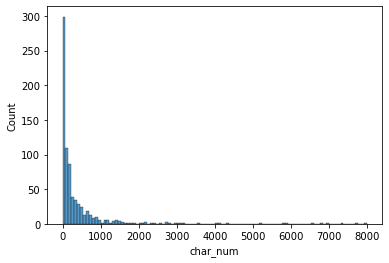

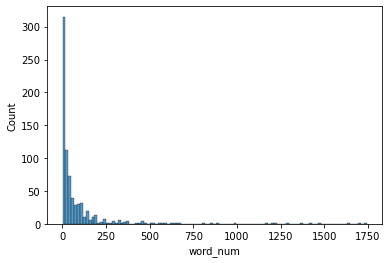

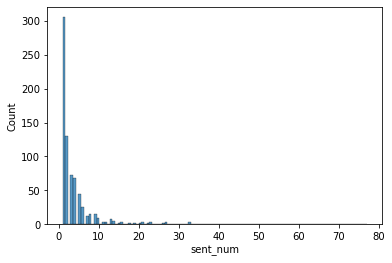

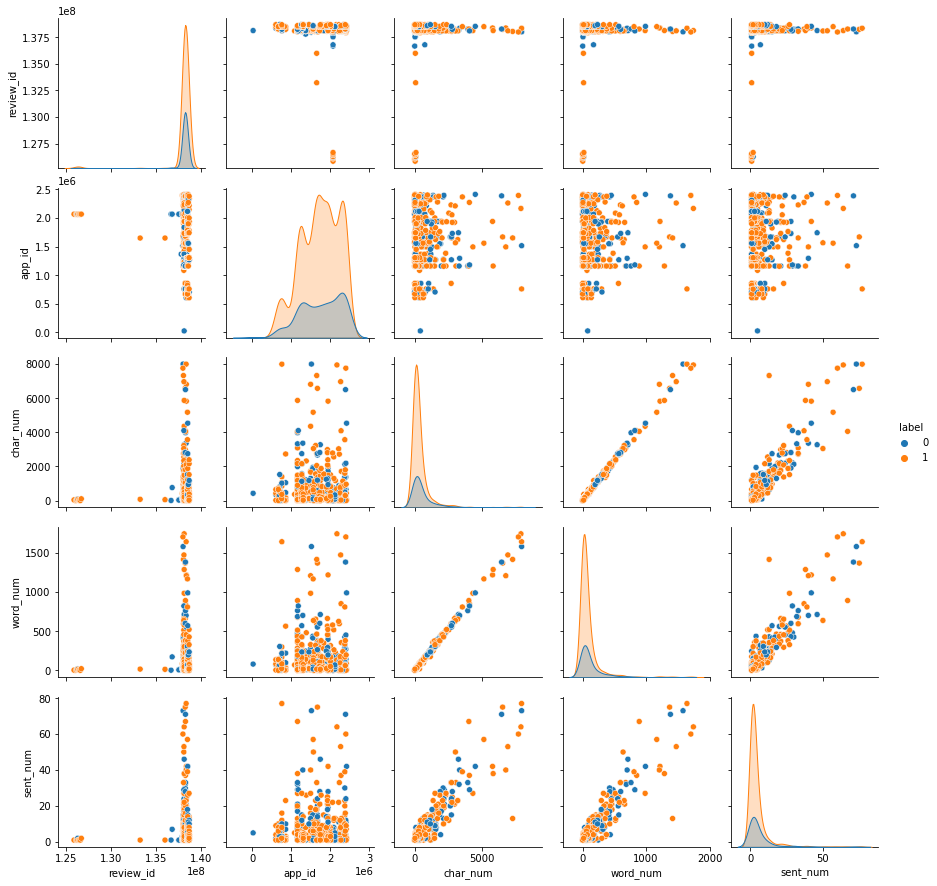

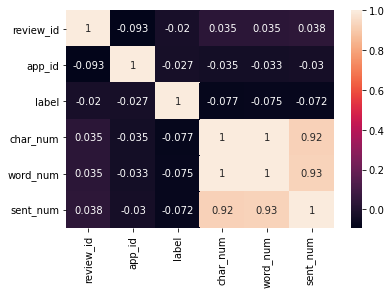

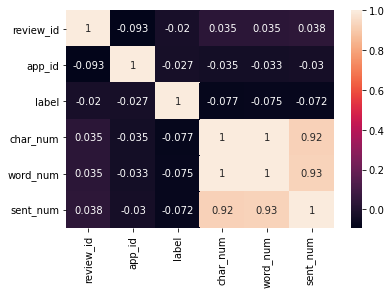

In [21]:
#neg. reviews description
new_df[new_df['label'] == -1][['char_num','word_num','sent_num']].describe()

#pos. reviews description
new_df[new_df['label'] == 1][['char_num','word_num','sent_num']].describe()

import seaborn as sns

sns.histplot(new_df[new_df['label'] == 1]['char_num'])
sns.histplot(new_df[new_df['label'] == -1]['char_num'],color='red')

plt.show()

sns.histplot(new_df[new_df['label'] == 1]['word_num'])
sns.histplot(new_df[new_df['label'] == -1]['word_num'],color='red')

plt.show()

sns.histplot(new_df[new_df['label'] == 1]['sent_num'])
sns.histplot(new_df[new_df['label'] == -1]['sent_num'],color='red')

plt.show()

sns.pairplot(new_df,hue='label')
plt.show()

sns.heatmap(new_df.corr(),annot=True)
plt.show()
sns.heatmap(new_df.corr(),annot=True)
plt.show()

## Preprocessing by applying the nltk Library 
### In order to convert the free text to lowercase, tokenizing it into individual words, removing stopwords and punctuation, and applying stemming using the Porter stemming algorithm)

In [22]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\louis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
def convert_text(review_text):
    text = review_text.lower()
    text = nltk.word_tokenize(text)

    x = []
    y = []
    ps = PorterStemmer()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
    for i in x:
        y.append(ps.stem(i))
    return ' '.join(y)

In [24]:
new_df['converted_text']=new_df['review_text'].apply(convert_text)

<ipython-input-24-d67cbe701d51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['converted_text']=new_df['review_text'].apply(convert_text)


In [25]:
dftest['converted_text']=dftest['review_text'].apply(convert_text)

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
new_df['review_text'][685]

"Grinding heroes in DD2? Nope. \n\nWith every chapter/run you will automatically lose all your progress. Your skill points, your skills, your trinkets, everything. Imagine.\nYou beat the chapter, you manage to slay the final boss... Which is reasonably hard, unfair and stressful enough  as it is - and your characters that you geared and skilled up... Will enter a new chapter exhausted and wrecked, no hp, high stress, with all their ilnesses. And that's it! - all skills back at lvl 0, no items, no money, nothing. \nHave you finished the chapter stockpiled on money? Reseted, gone, you start with NOTHING.\n\nThumbs down. Disappointed"

In [55]:
new_df['converted_text'][685]

"grind hero dd2 nope everi chapter/run automat lose progress skill point skill trinket everyth imagin beat chapter manag slay final boss ... reason hard unfair stress enough charact gear skill ... enter new chapter exhaust wreck hp high stress il 's skill back lvl 0 item money noth finish chapter stockpil money reset gone start noth thumb disappoint"

In [51]:
dftest['review_text'][15]

"I like the game, it's easy to get the hang of it and build up a large tilestack and a lot of points. I have to not recommend it at the current price point though, because after about 6 hours I discovered that you can finish the game. Once you've built all structures, you will be prompted to build a statue that ends the game. I wanted to keep going, but that's not an option. I understand there needs to be an end in order to compete with highscores, but I really can't recommend the game without a mode where you can keep going."

In [52]:
dftest['converted_text'][15]

"like game 's easi get hang build larg tilestack lot point recommend current price point though 6 hour discov finish game 've built structur prompt build statu end game want keep go 's option understand need end order compet highscor realli ca n't recommend game without mode keep go"

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features = 3000)
tfidf = TfidfVectorizer(max_features=5000)

In [32]:
X_train = cv.fit_transform(new_df['review_text']).toarray()
#X_train = cv.fit_transform(new_df['converted_text']).toarray() in case we would like to use the transformed text

In [33]:
X_test = cv.fit_transform(dftest['review_text']).toarray()
#X_test = cv.fit_transform(dftest['converted_text']).toarray() in case we would like to use the transformed text

In [34]:
new_df

,review_id,app_id,review_text,label,char_num,word_num,sent_num,converted_text
0,138255165,1159690,A Raft style survival where you basically brin...,0,2214,480,29,raft style surviv basic bring base along make ...
1,138255297,1159690,real good game,1,14,3,1,real good game
2,138252244,1667180,Finished it in 24 hours. I liked it. Somehow i...,1,125,31,4,finish 24 hour like somehow kept want return p...
3,138273841,1559600,Pretty horses game. addicted. ahh.,1,34,8,3,pretti hors game addict ahh
4,138274158,855740,not very fun,0,12,3,1,fun
...,...,...,...,...,...,...,...,...
1005,138675867,1304930,Its like Dead by Daylight but muuch better and...,1,88,17,2,like dead daylight muuch better perform sooo c...
1006,138682108,1742020,korone beat the shit out of me with a chainsaw...,1,66,14,1,koron beat shit chainsaw 10/10 recommend
1007,138675949,1304930,GRIND!,1,6,2,1,grind
1008,138676038,1304930,Fantastic addition to the Outlast series.\nLov...,1,179,34,3,fantast addit outlast seri love play friend lo...


In [35]:
y_train = new_df['label'].values
y_test = dftest['label'].values

## Scattertext Visualization


In [36]:
#pip install spacy
#pip install scattertext
#pip install Pillow
#pip install --user https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.1.0/en_core_web_sm-3.1.0.tar.gz

In [58]:
import scattertext as st
import pandas as pd

# Load your data from the CSV file
scattertextdftrain = pd.read_csv('alldatatrainextra.csv')

# Preprocess your data, if needed
scattertextdftrain['parse'] = scattertextdftrain['review_text'].astype(str).apply(st.whitespace_nlp_with_sentences)

# Create the corpus from the parsed documents
corpus = st.CorpusFromParsedDocuments(
    scattertextdftrain,
    category_col='label',
    parsed_col='parse'
).build().get_unigram_corpus().compact(st.AssociationCompactor(2000))

# Generate the HTML visualization
html = st.produce_scattertext_explorer(
    corpus,
    category='1',
    category_name='Positive',
    not_category_name='Negative',
    minimum_term_frequency=0,
    pmi_threshold_coefficient=0,
    width_in_pixels=1000,
    metadata=scattertextdftrain['review_id'],
    transform=st.Scalers.dense_rank)

# Save the HTML visualization to a file with UTF-8 encoding
with open('scattertext_visualization.html', 'w', encoding='utf-8') as file:
    file.write(html)


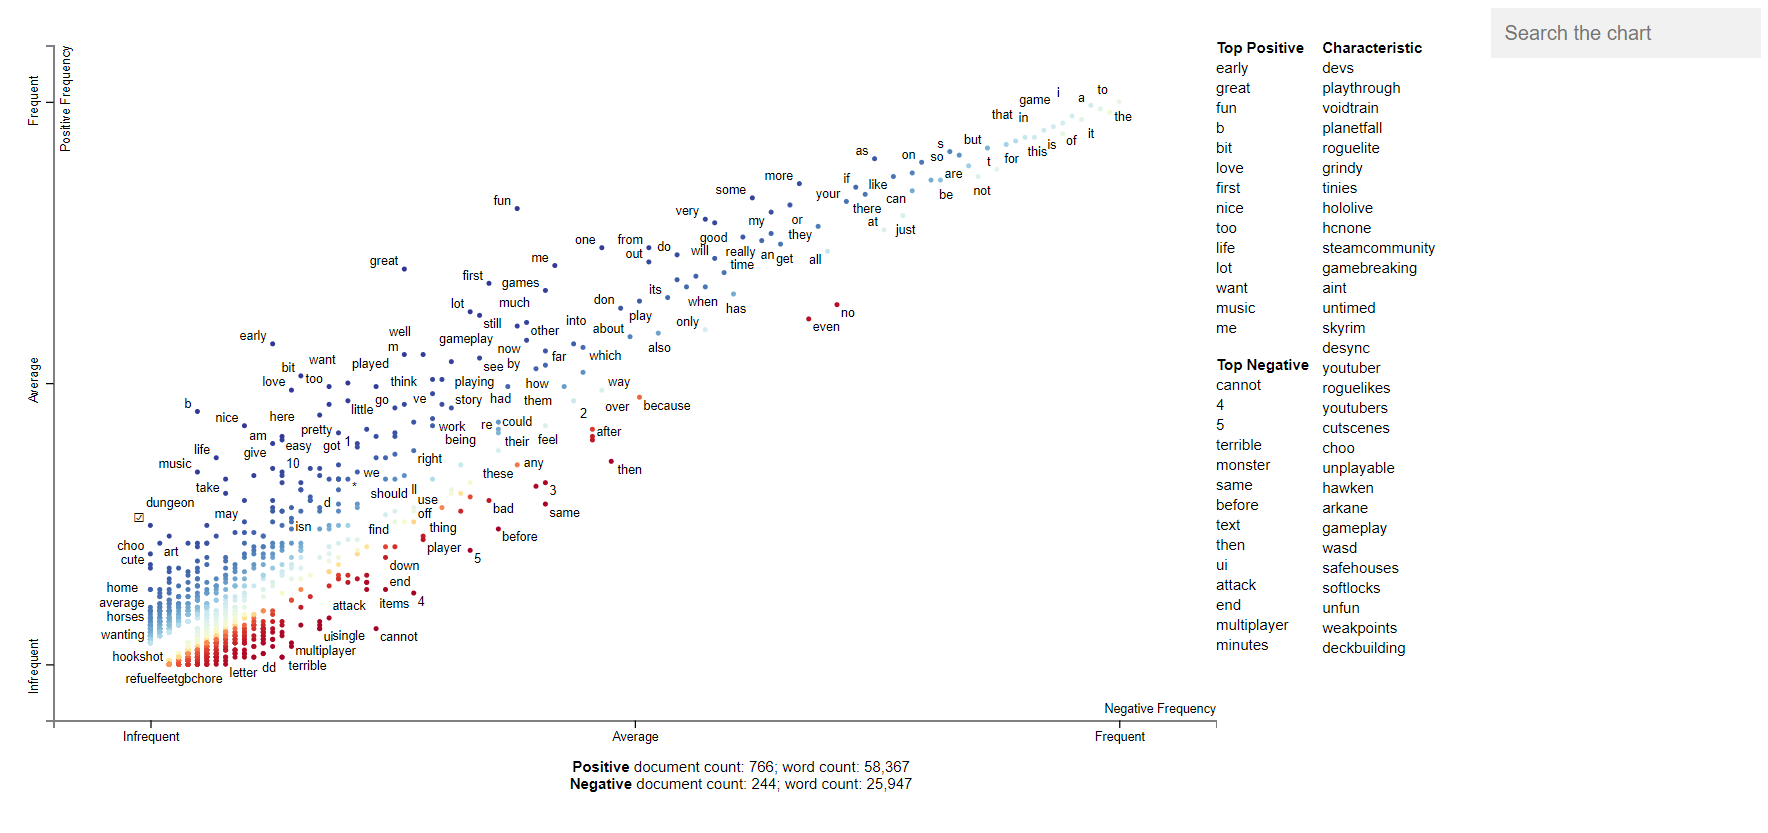

In [60]:
#output snippet of the HTML file

from PIL import Image
from IPython.display import display

# Specify the image file path
image_path = 'ScatterTextViz.png'  # Replace with the actual image file path

# Open the image file
image = Image.open(image_path)

# Display the image
display(image)

## Model construction and performance 

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from IPython.display import Markdown, display

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
confusion1 = confusion_matrix(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)

# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
confusion2 = confusion_matrix(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
confusion3 = confusion_matrix(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)

# Format and display the output
output = f"""
<font size="4">Model Evaluation Results:</font>
<hr style="height:1px;border:none;color:#333;background-color:#333;">

<font size="3">
<b>Gaussian Naive Bayes</b>
</font>
<br>  <!-- Additional line break added here -->
Accuracy: <b>{accuracy1:.4f}</b>
<br>
Confusion Matrix:
{confusion1}
<br>
Precision: <b>{precision1:.4f}</b>

<hr style="height:1px;border:none;color:#333;background-color:#333;">

<font size="3">
<b>Multinomial Naive Bayes</b>
</font>
<br>  <!-- Additional line break added here -->
Accuracy: <b>{accuracy2:.4f}</b>
<br>
Confusion Matrix:
{confusion2}
<br>
Precision: <b>{precision2:.4f}</b>

<hr style="height:1px;border:none;color:#333;background-color:#333;">

<font size="3">
<b>Bernoulli Naive Bayes</b>
</font>
<br>  <!-- Additional line break added here -->
Accuracy: <b>{accuracy3:.4f}</b>
<br>
Confusion Matrix:
{confusion3}
<br>
Precision: <b>{precision3:.4f}</b>
"""

display(Markdown(output))



<font size="4">Model Evaluation Results:</font>
<hr style="height:1px;border:none;color:#333;background-color:#333;">

<font size="3">
<b>Gaussian Naive Bayes</b>
</font>
<br>  <!-- Additional line break added here -->
Accuracy: <b>0.6166</b>
<br>
Confusion Matrix:
[[  5  50]
 [ 47 151]]
<br>
Precision: <b>0.7512</b>

<hr style="height:1px;border:none;color:#333;background-color:#333;">

<font size="3">
<b>Multinomial Naive Bayes</b>
</font>
<br>  <!-- Additional line break added here -->
Accuracy: <b>0.5494</b>
<br>
Confusion Matrix:
[[ 43  12]
 [102  96]]
<br>
Precision: <b>0.8889</b>

<hr style="height:1px;border:none;color:#333;background-color:#333;">

<font size="3">
<b>Bernoulli Naive Bayes</b>
</font>
<br>  <!-- Additional line break added here -->
Accuracy: <b>0.7352</b>
<br>
Confusion Matrix:
[[ 28  27]
 [ 40 158]]
<br>
Precision: <b>0.8541</b>


In [63]:
# Add predictions as a new column to the DataFrame
dftest['predictions'] = y_pred3

# Export the DataFrame to a CSV file
dftest.to_csv('test_predictednow.csv', index=False)